In [18]:
pip install jugaad-data

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [68]:
import pandas as pd
from datetime import datetime
from jugaad_data.nse import stock_df
import os
import time
import random
import matplotlib.pyplot as plt
import numpy as np

In [69]:
output_file = "README.md"
images_dir = "images"

# Create the images directory if it doesn't exist
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

In [70]:
# Read the CSV file into a DataFrame
df = pd.read_csv('IPO_16To25.csv')

# Filter rows where the SECURITY TYPE is "EQ"
eq_symbols_df = df[df['SECURITY TYPE'] == 'EQ']

# Extract the Symbol column
symbols = eq_symbols_df['Symbol'].tolist()

# Save the symbols to a new CSV file
symbols_df = pd.DataFrame(symbols, columns=['Symbol'])
symbols_df.to_csv('eq_symbols.csv', index=False)

print("EQ symbols saved to 'eq_symbols.csv'")

EQ symbols saved to 'eq_symbols.csv'


In [71]:
print("No. of stocks listed from the year 2016 of type EQ : ", len(symbols))
print(symbols)

No. of stocks listed from the year 2016 of type EQ :  336
['LAXMIDENTL', 'QUADFUTURE', 'SGLTL', 'INDOFARM', 'UNIMECH', 'VENTIVE', 'CARRARO', 'SENORES', 'TRANSRAILL', 'SANATHAN', 'CEWATER', 'DAMCAPITAL', 'IGIL', 'IKS', 'VMM', 'SAILIFE', 'MOBIKWIK', 'SURAKSHA', 'EIEL', 'NTPCGREEN', 'BLACKBUCK', 'NIVABUPA', 'SWIGGY', 'ACMESOLAR', 'SAGILITY', 'AFCONS', 'GODAVARIB', 'WAAREEENER', 'DBEIL', 'HYUNDAI', 'GARUDA', 'KRN', 'ARKADE', 'NORTHARC', 'WCIL', 'PNGJL', 'KROSS', 'BAJAJHFL', 'STYLEBAAZA', 'ECOSMOBLTY', 'PREMIERENE', 'INTERARCH', 'FIRSTCRY', 'UNIECOM', 'OLAELEC', 'CEIGALL', 'AKUMS', 'SANSTAR', 'EMCURE', 'BANSALWIRE', 'ABDL', 'STANLEY', 'DEEDEV', 'IXIGO', 'KRONOX', 'AWFIS', 'GODIGIT', 'TBOTEK', 'AADHARHFC', 'INDGN', 'JNKINDIA', 'IDEAFPO', 'BHARTIHEXA', 'KRYSTAL', 'PVSL', 'GOPAL', 'JGCHEM', 'RKSWAMY', 'EXICOM', 'GPTHEALTH', 'JUNIPER', 'ENTERO', 'CAPITALSFB', 'JSFB', 'RPTECH', 'PARKHOTELS', 'BLSE', 'EPACK', 'MEDIASSIST', 'JYOTICNC', 'INNOVACAP', 'AZAD', 'HAPPYFORGE', 'MUFTI', 'MUTHOOTMF', 'SURA

In [72]:
# Create the "data" directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Dates for fetching data
from_date = date(2016, 1, 1)
to_date = date(2025, 1, 25)

# Record the total start time
total_start_time = time.time()

# Download stock data and save it to CSV
for symbol in symbols:
    csv_file_path = f"data/{symbol}.csv"
    if os.path.exists(csv_file_path):
        print(f"File for {symbol} already exists. Skipping...")
        continue  # Skip to the next symbol

    # Add a delay of 2 to 5 seconds between calls - Else gets throttled by NSE
    time.sleep(random.uniform(2, 5))

    try:
        start_time = time.time()  # Record the start time

        # Fetch stock data
        print(f"Fetching data for {symbol}...")
        df = stock_df(symbol=symbol, 
                      from_date=from_date, 
                      to_date=to_date, 
                      series="EQ")

        # Save to CSV
        df.to_csv(csv_file_path, index=False)
        save_time = time.time()  # Record the time after saving

        print(f"Total time taken for {symbol}: {save_time - start_time:.2f} seconds\n")

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Record the total end time
total_end_time = time.time()
print(f"Total time taken for all symbols: {total_end_time - total_start_time:.2f} seconds\n")

File for LAXMIDENTL already exists. Skipping...
File for QUADFUTURE already exists. Skipping...
File for SGLTL already exists. Skipping...
File for INDOFARM already exists. Skipping...
File for UNIMECH already exists. Skipping...
File for VENTIVE already exists. Skipping...
File for CARRARO already exists. Skipping...
File for SENORES already exists. Skipping...
File for TRANSRAILL already exists. Skipping...
File for SANATHAN already exists. Skipping...
File for CEWATER already exists. Skipping...
File for DAMCAPITAL already exists. Skipping...
File for IGIL already exists. Skipping...
File for IKS already exists. Skipping...
File for VMM already exists. Skipping...
File for SAILIFE already exists. Skipping...
File for MOBIKWIK already exists. Skipping...
File for SURAKSHA already exists. Skipping...
File for EIEL already exists. Skipping...
File for NTPCGREEN already exists. Skipping...
File for BLACKBUCK already exists. Skipping...
File for NIVABUPA already exists. Skipping...
File 

#### Distribution of Lifetime IPO returns from the date launched till date

Results and combined plot have been written to README.md and image is stored in the 'images' folder.


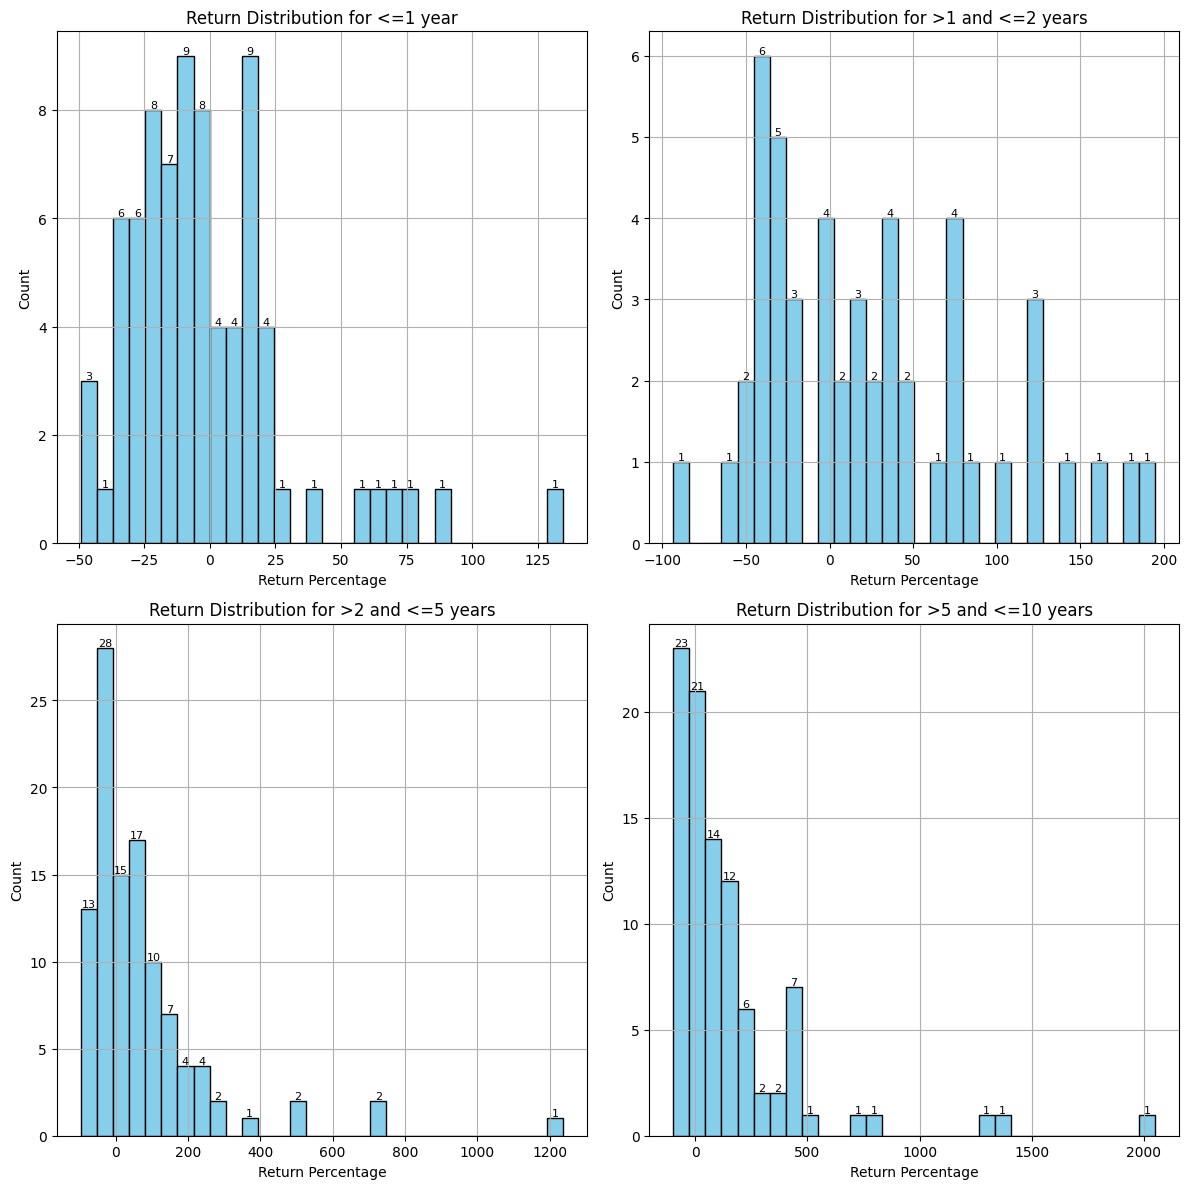

In [82]:
# Path to the directory containing CSV files
data_dir = "data/"

# List to store return percentages
returns = []

# Loop through all files in the "data" directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        # Extract stock name from the filename (excluding the .csv extension)
        stock_name = filename.replace(".csv", "")
        
        # Load the stock data from the CSV file
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        
        # Get the oldest and latest closing prices
        oldest_close = df['CLOSE'].iloc[-1]  # Oldest price (last row)
        latest_close = df['CLOSE'].iloc[0]  # Latest price (first row)
        
        # Calculate the return percentage
        return_percentage = ((latest_close - oldest_close) / oldest_close) * 100
        
        # Store the return percentage in the list
        returns.append(return_percentage)

# Open the README.md file in write mode to clean it
with open(output_file, "w") as readme:
    readme.write("# Stock Performance Analysis\n")
    readme.write("This report categorizes stocks by IPO age and displays those with a CAGR of >=20%.\n\n")
    
    # Create a figure to hold all subplots
    plt.figure(figsize=(12, 12))
    
    # Iterate through your categories and plot the histograms on subplots
    for idx, (category, returns) in enumerate(returns_by_category.items(), 1):
        plt.subplot(2, 2, idx)
        
        # Plot the histogram
        n, bins, patches = plt.hist(returns, bins=30, color='skyblue', edgecolor='black')
        
        # Annotate counts on top of each bar
        for i in range(len(patches)):
            count = int(n[i])  # Get the count for each bar
            if count > 0:  # Only annotate bars with counts > 0
                plt.text(patches[i].get_x() + patches[i].get_width() / 2, 
                         n[i], 
                         str(count), 
                         ha='center', 
                         va='bottom', 
                         fontsize=8, 
                         color='black')

        # Set titles and labels
        plt.xlabel('Return Percentage')
        plt.ylabel('Count')
        plt.title(f'Return Distribution for {category}')
        plt.grid(True)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the combined plot to the images folder
    combined_plot_filename = f"{images_dir}/combined_return_distribution.png"
    plt.savefig(combined_plot_filename, format="png")
    
    # Write the plot reference to the README.md file
    readme.write("## Return Distributions for different IPO ages\n")
    readme.write(f"![Combined Return Distribution](./{combined_plot_filename})\n\n")
    
    print(f"Results and combined plot have been written to {output_file} and image is stored in the '{images_dir}' folder.")

#### Distribution of IPO stocks with their returns divided based on their age/term

Results and combined plot have been written to README.md and image is stored in the 'images' folder.


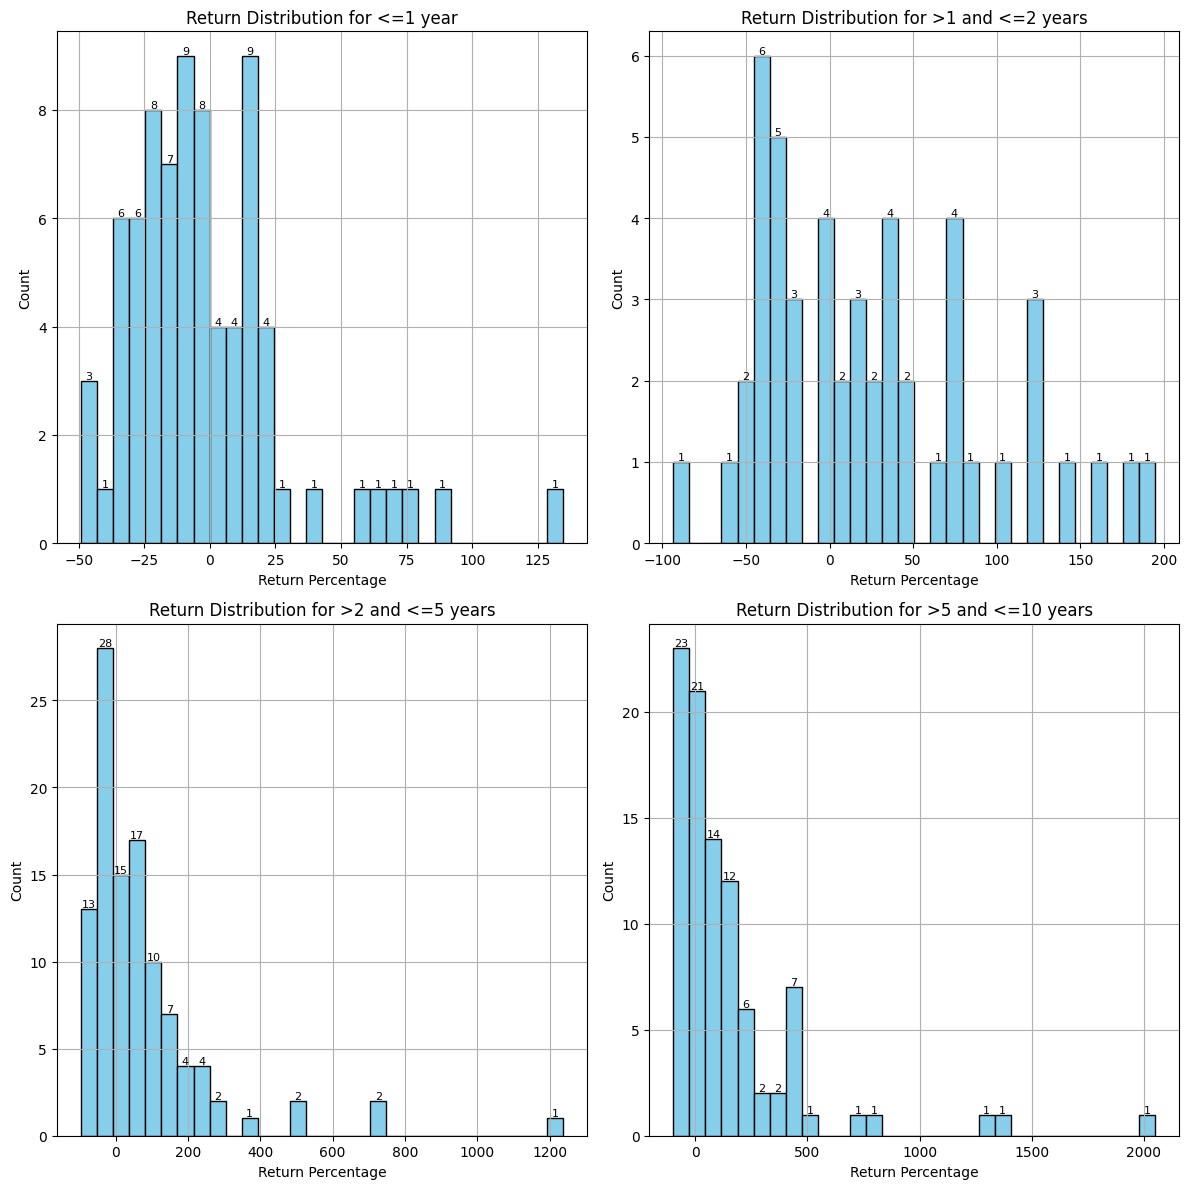

In [83]:
# Path to the directory containing CSV files
data_dir = "data/"

# Dictionary to store return percentages for each year category
returns_by_category = {
    "<=1 year": [],
    ">1 and <=2 years": [],
    ">2 and <=5 years": [],
    ">5 and <=10 years": []
}

# Loop through all files in the "data" directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        # Extract stock name from the filename (excluding the .csv extension)
        stock_name = filename.replace(".csv", "")
        
        # Load the stock data from the CSV file
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        
        # Parse the oldest and latest dates
        oldest_date = datetime.strptime(df['DATE'].iloc[-1], "%Y-%m-%d")
        latest_date = datetime.strptime(df['DATE'].iloc[0], "%Y-%m-%d")
        
        # Calculate the number of years between the oldest and latest date
        years_diff = (latest_date - oldest_date).days / 365.25
        
        # Calculate the return percentage
        oldest_close = df['CLOSE'].iloc[-1]  # Oldest price (last row)
        latest_close = df['CLOSE'].iloc[0]  # Latest price (first row)
        return_percentage = ((latest_close - oldest_close) / oldest_close) * 100
        
        # Assign the return percentage to the appropriate year category
        if years_diff <= 1:
            returns_by_category["<=1 year"].append(return_percentage)
        elif 1 < years_diff <= 2:
            returns_by_category[">1 and <=2 years"].append(return_percentage)
        elif 2 < years_diff <= 5:
            returns_by_category[">2 and <=5 years"].append(return_percentage)
        elif 5 < years_diff <= 10:
            returns_by_category[">5 and <=10 years"].append(return_percentage)

# Open the README.md file in append mode
with open(output_file, "a") as readme:
    readme.write("# Stock Performance Analysis\n")
    readme.write("This report categorizes stocks by IPO age and displays those with a CAGR of >=20%.\n\n")
    
    # Create a figure to hold all subplots
    plt.figure(figsize=(12, 12))
    
    # Iterate through your categories and plot the histograms on subplots
    for idx, (category, returns) in enumerate(returns_by_category.items(), 1):
        plt.subplot(2, 2, idx)
        
        # Plot the histogram
        n, bins, patches = plt.hist(returns, bins=30, color='skyblue', edgecolor='black')
        
        # Annotate counts on top of each bar
        for i in range(len(patches)):
            count = int(n[i])  # Get the count for each bar
            if count > 0:  # Only annotate bars with counts > 0
                plt.text(patches[i].get_x() + patches[i].get_width() / 2, 
                         n[i], 
                         str(count), 
                         ha='center', 
                         va='bottom', 
                         fontsize=8, 
                         color='black')

        # Set titles and labels
        plt.xlabel('Return Percentage')
        plt.ylabel('Count')
        plt.title(f'Return Distribution for {category}')
        plt.grid(True)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the combined plot to the images folder
    combined_plot_filename = f"{images_dir}/combined_return_distribution.png"
    plt.savefig(combined_plot_filename, format="png")
    
    # Write the plot reference to the README.md file
    readme.write("## Combined Return Distribution\n")
    readme.write(f"![Combined Return Distribution](./{combined_plot_filename})\n\n")
    
    print(f"Results and combined plot have been written to {output_file} and image is stored in the '{images_dir}' folder.")

#### CAGR Distribution in different categories

In [76]:
# Path to the directory containing CSV files
data_dir = "data/"

# Dictionary to store CAGR values for each year category
cagr_by_category = {
    "<=1 year": [],
    ">1 and <=2 years": [],
    ">2 and <=5 years": [],
    ">5 and <=10 years": []
}

# Loop through all files in the "data" directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        # Extract stock name from the filename (excluding the .csv extension)
        stock_name = filename.replace(".csv", "")
        
        # Load the stock data from the CSV file
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        
        # Parse the oldest and latest dates
        oldest_date = datetime.strptime(df['DATE'].iloc[-1], "%Y-%m-%d")
        latest_date = datetime.strptime(df['DATE'].iloc[0], "%Y-%m-%d")
        
        # Calculate the number of years between the oldest and latest date
        years_diff = (latest_date - oldest_date).days / 365.25
        
        # Calculate CAGR
        oldest_close = df['CLOSE'].iloc[-1]  # Oldest price (last row)
        latest_close = df['CLOSE'].iloc[0]  # Latest price (first row)
        if years_diff > 0:
            cagr = ((latest_close / oldest_close) ** (1 / years_diff)) - 1
            cagr *= 100  # Convert to percentage
            
            # Assign the CAGR to the appropriate year category
            if years_diff <= 1:
                cagr_by_category["<=1 year"].append(cagr)
            elif 1 < years_diff <= 2:
                cagr_by_category[">1 and <=2 years"].append(cagr)
            elif 2 < years_diff <= 5:
                cagr_by_category[">2 and <=5 years"].append(cagr)
            elif 5 < years_diff <= 10:
                cagr_by_category[">5 and <=10 years"].append(cagr)

# Plot the distribution of CAGR for each year category
plt.figure(figsize=(12, 8))

# Clean the README.md file by opening it in write mode
with open(output_file, "a") as readme:
    readme.write("# Stock Performance Analysis\n")
    readme.write("This report categorizes stocks by IPO age and displays those with a CAGR of >=20%.\n\n")
    
    # Iterate through your categories and plot the first set of histograms
    for idx, (category, cagr_values) in enumerate(cagr_by_category.items(), 1):
        plt.subplot(2, 2, idx)
        
        # Calculate mean, median, variance, and probability
        mean_cagr = np.mean(cagr_values)
        median_cagr = np.median(cagr_values)
        variance_cagr = np.var(cagr_values)
        probability_above_20 = sum(c > 20 for c in cagr_values) / len(cagr_values) if cagr_values else 0

        # Plot the histogram
        n, bins, patches = plt.hist(cagr_values, bins=30, color='skyblue', edgecolor='black')

        # Annotate counts on top of each bar
        for i in range(len(patches)):
            count = int(n[i])  # Get the count for each bar
            if count > 0:  # Only annotate bars with counts > 0
                plt.text(patches[i].get_x() + patches[i].get_width() / 2, 
                         n[i], 
                         str(count), 
                         ha='center', 
                         va='bottom', 
                         fontsize=8, 
                         color='black')

        # Add annotations for statistics in the top-right corner
        plt.axvline(mean_cagr, color='red', linestyle='dashed', linewidth=1)
        plt.axvline(median_cagr, color='green', linestyle='dashed', linewidth=1)

        plt.xlabel('CAGR (%)')
        plt.ylabel('Count')
        plt.title(f'CAGR Distribution for {category}')
        plt.grid(True)

        # Annotate statistics
        plt.text(0.95, 0.95, f'Mean: {mean_cagr:.2f}%', ha='right', va='top', transform=plt.gca().transAxes, color="red")
        plt.text(0.95, 0.90, f'Median: {median_cagr:.2f}%', ha='right', va='top', transform=plt.gca().transAxes, color="green")
        plt.text(0.95, 0.85, f'Variance: {variance_cagr:.2f}', ha='right', va='top', transform=plt.gca().transAxes, color="blue")
        plt.text(0.95, 0.80, f'P(CAGR > 20%): {probability_above_20:.2%}', ha='right', va='top', transform=plt.gca().transAxes, color="purple")

        plt.tight_layout()  # Adjust layout to prevent overlap
        
        # Save the plot to the images folder
        plot_filename = f"{images_dir}/cagr_distribution_{category.replace(' ', '_')}.png"
        plt.savefig(plot_filename, format="png")

        # Write analysis text to README.md
        readme.write(f"## {category} - CAGR Distribution\n")
        readme.write(f"Mean CAGR: {mean_cagr:.2f}%\n")
        readme.write(f"Median CAGR: {median_cagr:.2f}%\n")
        readme.write(f"Variance: {variance_cagr:.2f}\n")
        readme.write(f"Probability of CAGR > 20%: {probability_above_20:.2%}\n\n")
        readme.write(f"![CAGR Distribution for {category}](./{plot_filename})\n\n")
        
        # Clear the plot to avoid overlapping between subplots
        plt.clf()

    print(f"Results and plots have been written to {output_file} and images are stored in the '{images_dir}' folder.")

Results and plots have been written to README.md and images are stored in the 'images' folder.


<Figure size 1200x800 with 0 Axes>

##### With passing age of the IPO, it is getting tougher to pick the stocks which generates a base 20% CAGR

#### Get all the top promisers in each one of the buckets

In [77]:
# Path to the directory containing CSV files
data_dir = "data/"
metadata_file = "IPO_16To25.csv"

# Initialize dictionary for categories and total stock counts
stocks_by_category = {f">{i} and <= {i + 1} years": [] for i in range(10)}
stocks_by_category[">0 and <= 1 years"] = []
total_stocks_by_category = {f">{i} and <= {i + 1} years": 0 for i in range(10)}
total_stocks_by_category[">0 and <= 1 years"] = 0

# Load IPO metadata to map symbols to company names
metadata_df = pd.read_csv(metadata_file, delimiter=",")
symbol_to_name = dict(zip(metadata_df["Symbol"], metadata_df["COMPANY NAME"]))

# Loop through all files in the "data" directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        # Extract stock symbol from the filename (excluding the .csv extension)
        stock_symbol = filename.replace(".csv", "")
        company_name = symbol_to_name.get(stock_symbol, "Unknown Company")
        
        # Load the stock data from the CSV file
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        
        # Parse the oldest and latest dates
        oldest_date = datetime.strptime(df['DATE'].iloc[-1], "%Y-%m-%d")
        latest_date = datetime.strptime(df['DATE'].iloc[0], "%Y-%m-%d")
        
        # Calculate the number of years between the oldest and latest date
        years_diff = (latest_date - oldest_date).days / 365.25
        
        # Calculate CAGR
        oldest_close = df['CLOSE'].iloc[-1]  # Oldest price (last row)
        latest_close = df['CLOSE'].iloc[0]  # Latest price (first row)
        if years_diff > 0:
            cagr = ((latest_close / oldest_close) ** (1 / years_diff)) - 1
            cagr *= 100  # Convert to percentage
            
            # Determine the category and increment the total stock count
            if years_diff <= 1:
                category_key = ">0 and <= 1 years"
            else:
                for i in range(1, 10):
                    if i < years_diff <= i + 1:
                        category_key = f">{i} and <= {i + 1} years"
                        break
            
            total_stocks_by_category[category_key] += 1  # Increment total count
            
            # Assign the stock to the appropriate year category if CAGR >= 20%
            if cagr >= 20:
                stocks_by_category[category_key].append((stock_symbol, company_name, cagr))

# Open the README.md file in write mode
with open(output_file, "a") as readme:
    readme.write("# Stock Performance Analysis\n")
    readme.write("This report categorizes stocks by IPO age and displays those with a CAGR of >=20%.\n\n")

    # Print tables for each category with success percentage and company names
    for category, stocks in stocks_by_category.items():
        total_count = total_stocks_by_category[category]
        success_count = len(stocks)
        success_percentage = (success_count / total_count) * 100 if total_count > 0 else 0

        # Print to the console
        print(f"\n{'='*80}\nTable for {category} with CAGR(>=20%): {success_count}/{total_count} ({success_percentage:.2f}%)\n{'='*80}")
        
        # Write to README.md
        readme.write(f"## {category}\n")
        readme.write(f"Total Stocks in Category: {total_count}\n")
        readme.write(f"Success Rate (CAGR >= 20%): {success_percentage:.2f}%\n\n")

        if stocks:
            # Write table header to README.md
            readme.write("| Symbol               | Company Name                                         | CAGR (%) |\n")
            readme.write("|----------------------|-----------------------------------------------------|----------|\n")

            # Print the table content to the console and write it to README.md
            for symbol, name, cagr in sorted(stocks, key=lambda x: x[2], reverse=True):
                print(f"{symbol:<20} {name:<50} {cagr:.2f}")
                # Append to the README.md file
                readme.write(f"| {symbol:<20} | {name:<50} | {cagr:.2f} |\n")
        else:
            print("No stocks in this category with CAGR >= 20%.")
            readme.write("No stocks in this category with CAGR >= 20%.\n")
        
        readme.write("\n---\n\n")

print(f"Results have been written to {output_file}.")


Table for >0 and <= 1 years with CAGR(>=20%): 22/77 (28.57%)
QUADFUTURE           Quadrant Future Tek Limited                        33842.54
SAGILITY             Sagility India Limited                             3205.94
BLACKBUCK            Zinka Logistics Solutions Limited                  576.71
KRN                  KRN Heat Exchanger and Refrigeration Limited       446.22
EIEL                 Enviro Infra Engineers Limited                     235.09
IGIL                 International Gemmological Institute (India) Limited 193.46
EPACK                EPACK Durable Limited                              137.60
GARUDA               Garuda Construction and Engineering Limited        115.57
JGCHEM               J G Chemicals Limited                              105.64
AWFIS                Awfis Space Solutions Limited                      105.39
INTERARCH            Interarch Building Products Limited                85.82
BHARTIHEXA           Bharti Hexacom Limited                      